In [103]:
import cv2
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import copy

In [104]:
def show_img_range(np_array, max, min):
    plt.imshow(np_array, cmap='gray', vmin=max, vmax=min)
    plt.colorbar()  
    plt.show()

def show_img(np_array):
    plt.imshow(np_array, cmap='gray')
    plt.colorbar()  
    plt.show()   

In [105]:
# 原圖
im = cv2.imread('test123.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype(np.float64)
im.shape
height, width = im.shape[:2]
print(height)
print(width)

2048
2048


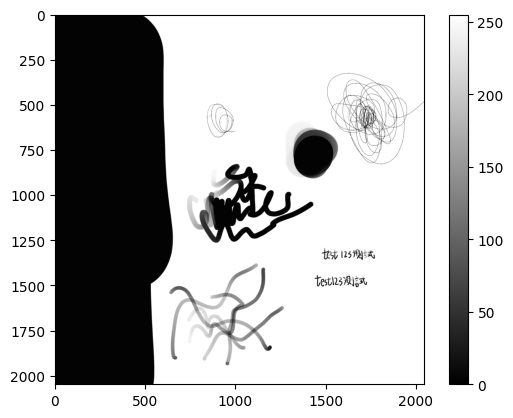

In [106]:
show_img(im)

In [107]:
# 一維DCT轉換
def dct1d(signal):
    return dct(signal, type=2, norm='ortho')

# 二維DCT轉換
def dct2d(image):
    return dct(dct(image, axis=0, type=2, norm='ortho'), axis=1, type=2, norm='ortho')



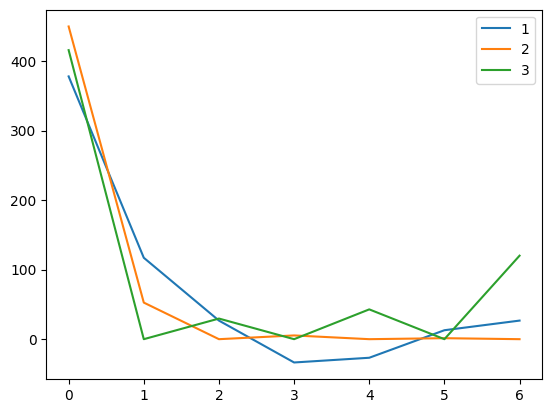

In [108]:
# 進行一維DCT轉換
dct_signal1=np.array([200,200,200,100,100,100,100])
dct_signal2=np.array([200,190,180,170,160,150,140])
dct_signal3=np.array([200,100,200,100,200,100,200])

plt.plot(dct1d(dct_signal1),label='1')
plt.plot(dct1d(dct_signal2),label='2')
plt.plot(dct1d(dct_signal3),label='3')

plt.legend()
plt.show()

In [109]:
# # 取座標後七點
# # 每次DCT取的點的數量
# points_to_select = 40

# # 用於存儲每一行的DCT結果
# all_dct_results = []

# # 進行循環，對每一行取七個點進行DCT轉換，然後將結果合併
# for row in im:
#     row_dct_results = []
#     for i in range(len(row) - points_to_select + 1):
#         selected_points = row[i:i + points_to_select]
#         dct_transformed = dct(selected_points, type=2, norm='ortho')
#         row_dct_results.append(np.max(np.abs(dct_transformed[32:])))
#     all_dct_results.append(row_dct_results)

# # 將結果轉換為NumPy array
# all_dct_results = np.array(all_dct_results)



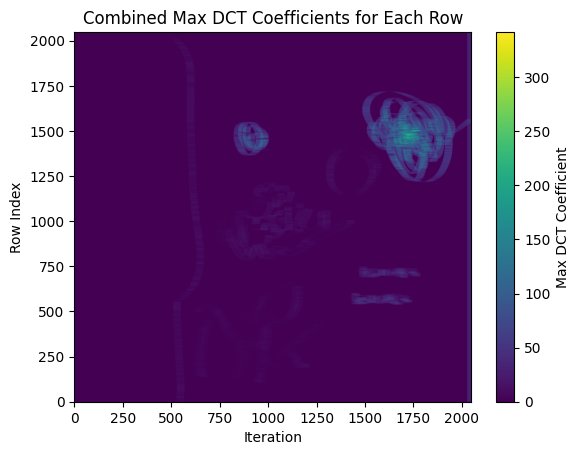

In [110]:
# 取前後40個點dct
# 每次DCT取的點的數量
points_to_select = 41
half_points = 20  # 每個點的前後各取 20 個點

# 用於存儲每一行的DCT最大值
all_dct_results = []

# 進行循環，對每一行取 41 個點進行DCT轉換，取每個點的前後各 20 個點，點不足時補0
for row in im:
    row_dct_results = []
    for i in range(len(row)):
        start_index = max(0, i - half_points)
        end_index = min(len(row), i + half_points + 1)
        selected_points = np.pad(row[start_index:end_index], (max(0, half_points - i), max(0, i + half_points + 1 - len(row))), 'constant', constant_values=0)
        dct_transformed = dct(selected_points, type=2, norm='ortho')
        row_dct_results.append(np.max(np.abs(dct_transformed[32:])))
    all_dct_results.append(row_dct_results)

# 將結果轉換為NumPy array
all_dct_results = np.array(all_dct_results)

# 顯示合併後的DCT結果
plt.imshow(all_dct_results , cmap='viridis', aspect='auto', extent=[0, len(row_dct_results), 0, len(im)])
plt.colorbar(label='Max DCT Coefficient')
plt.title('Combined Max DCT Coefficients for Each Row')
plt.xlabel('Iteration')
plt.ylabel('Row Index')
plt.show()

(2048, 2048)


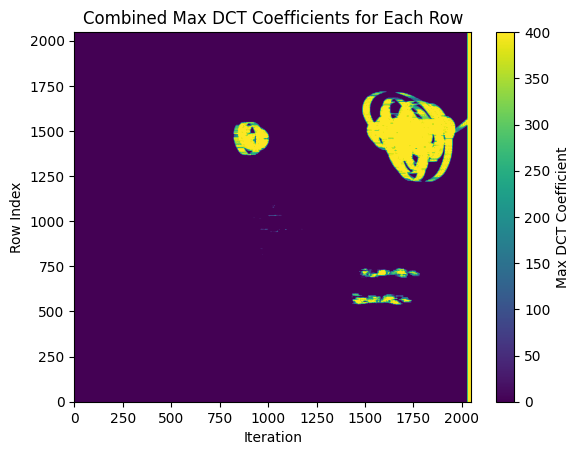

In [111]:
threshold_value = 25  # 你可以根據實際需求調整這個數值
all_dct_results_th = deep_copy_array = copy.deepcopy(all_dct_results)
all_dct_results_th[all_dct_results_th > threshold_value] = 400
all_dct_results_th[all_dct_results_th < threshold_value] = 0
print(all_dct_results_th.shape)


# 顯示合併後的DCT結果
plt.imshow(all_dct_results_th, cmap='viridis', aspect='auto', extent=[0, len(row_dct_results), 0, len(im)])
plt.colorbar(label='Max DCT Coefficient')
plt.title('Combined Max DCT Coefficients for Each Row')
plt.xlabel('Iteration')
plt.ylabel('Row Index')
plt.show()



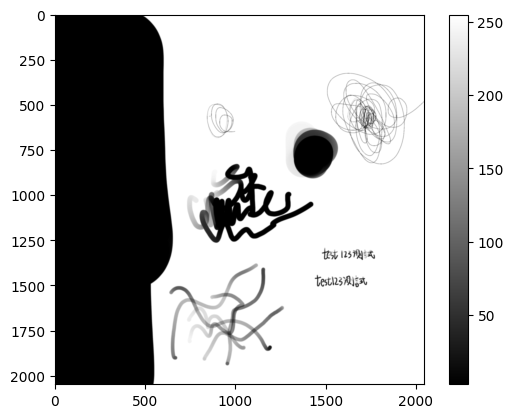

In [112]:
new_im = im.copy()
new_im = new_im.astype(np.float64)
LPF = cv2.GaussianBlur(im, (5, 5),  3, 3).astype(np.float64)
#LPF = cv2.blur(im, (5, 5), 1).astype(np.float64)
show_img(LPF)

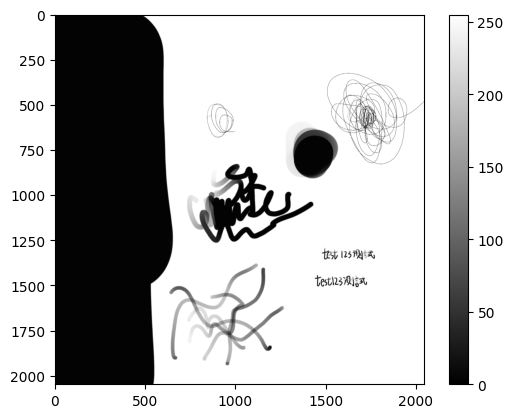

In [113]:
for m in range(height):
    for n in range(width):
        if all_dct_results_th[m,n]<300 :#可改
            new_im[m,n]=(im[m,n]+LPF[m,n])/2

show_img(new_im)

In [114]:
#圖
# 壓縮後的圖
cv2.imwrite('compression.jpg', im, [cv2.IMWRITE_JPEG_QUALITY, 70])  # 存成 jpg
compression = cv2.imread('compression.jpg')
compression = cv2.cvtColor(compression, cv2.COLOR_BGR2GRAY).astype(np.float64)
# pmod後壓縮後的圖
cv2.imwrite('compression after filter.jpg', new_im, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_filter = cv2.imread('compression after filter.jpg')
compression_filter = cv2.cvtColor(compression_filter, cv2.COLOR_BGR2GRAY).astype(np.float64)
# LPF的圖
cv2.imwrite('compression after LPF.jpg', LPF, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_LPF = cv2.imread('compression after LPF.jpg')
compression_LPF = cv2.cvtColor(compression_LPF, cv2.COLOR_BGR2GRAY).astype(np.float64)

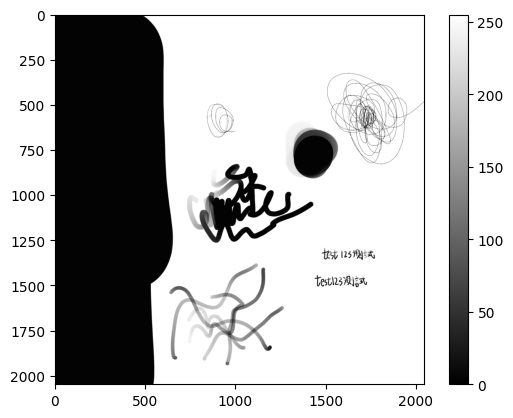

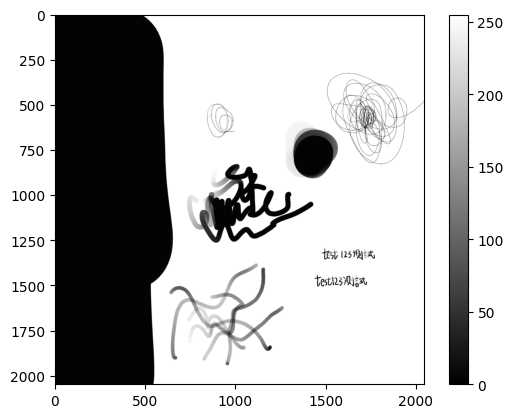

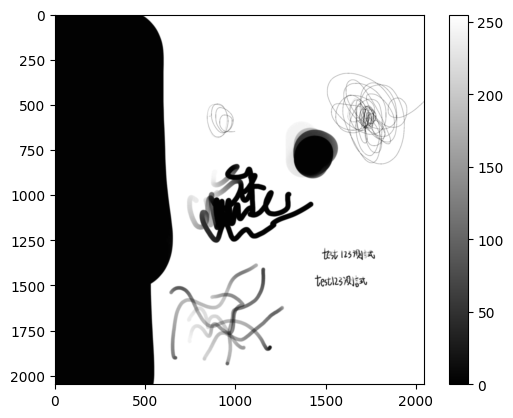

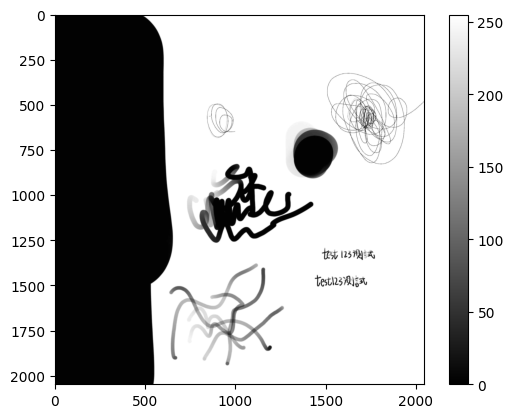

In [115]:
#原圖
show_img(im)
#壓縮後的圖
show_img(compression)
# 濾波壓縮後的圖
show_img(compression_LPF)
# pmod壓縮後的圖
show_img(compression_filter)